#### 1) Design Model (input, output size, forward pass)
#### 2) Construct Loss and Optimizer
#### 3) Training Loop
##### Forward Pass: Compute prediction
##### Backward Pass: Gradients

In [1]:
import torch as tc
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

##### 0) Prepare Data

In [2]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1,noise=20,random_state=1)
X = tc.from_numpy(X_numpy.astype(np.float32))
y = tc.from_numpy(y_numpy.astype(np.float32))
# reshape y from 1 row to column vector
y = y.view(y.shape[0],1)

n_samples, n_features = X.shape

##### 1) Model

In [3]:
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

##### 2) Loss and Optimizer

In [4]:
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = tc.optim.SGD(model.parameters(),lr=learning_rate)

##### 3) Training Loop

In [5]:
n_epochs = 100
for epoch in range(n_epochs):
    # Forward pass and loss
    y_pred = model(X)
    loss = criterion(y_pred, y)
    
    # Backward pass
    loss.backward()
    
    # Update
    optimizer.step()
    
    # Zero out gradients before next iteration
    optimizer.zero_grad()
    
    if epoch+1 % 10 == 0:
        print(f'epoch {epoch + 1}, loss = {loss.item():.4f}')

epoch 1, loss = 5686.8398
epoch 11, loss = 4211.4111
epoch 21, loss = 3145.2988
epoch 31, loss = 2374.0525
epoch 41, loss = 1815.5146
epoch 51, loss = 1410.6161
epoch 61, loss = 1116.8229
epoch 71, loss = 903.4650
epoch 81, loss = 748.3987
epoch 91, loss = 635.6162


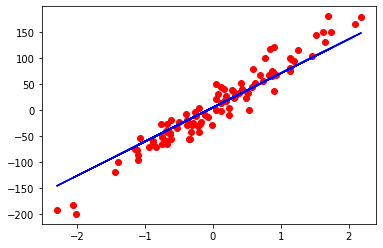

In [6]:
# Plot
predicted = model(X).detach() # removes operation from being tracked in gradient calc
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy,predicted, 'b')
plt.show()